<a href="https://colab.research.google.com/github/vicmanso/Projeto_Vendas/blob/main/An%C3%A1lise_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📥 Importação de bibliotecas e upload da base de dados

Nesta célula, realizei o upload do arquivo com a base de dados de vendas para o ambiente do Google Colab.  
Também importei as principais bibliotecas utilizadas ao longo da análise:

- **pandas** e **numpy** para manipulação e análise dos dados;
- **matplotlib.pyplot**, **seaborn** e **plotly.express** para criação de gráficos estáticos e interativos.

O uso do comando `!pip install plotly` garante a instalação da biblioteca `plotly`, caso ela não esteja disponível no ambiente.



In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install plotly
import plotly.express as px
import seaborn as sns

Saving vendas.xlsx to vendas.xlsx


## 📊 Carregamento da base de dados

Nesta célula, leio o arquivo `vendas.xlsx` e carrego os dados em um DataFrame do pandas chamado `vendas`.  
Também exibo o conteúdo da tabela para ter uma primeira visualização da base.

In [4]:
vendas=pd.read_excel("vendas.xlsx")
vendas

,ID_Pedido,ID_Cliente,Produto,Preço,Quantidade,DataVenda,Vendedor
0,P0000,C0000,Notebook,278.53,4.0,2024-07-14,Alice
1,P0001,C0001,Notebook,301.50,5.0,2024-11-26,Bob
2,P0002,C0002,Smartphone,790.28,2.0,2024-10-17,Alice
3,P0003,C0003,Notebook,720.59,2.0,2024-03-19,Daniel
4,P0004,C0004,Tablet,914.63,4.0,2024-08-23,Daniel
...,...,...,...,...,...,...,...
508,P0046,C0046,Smartphone,83.99,5.0,2024-03-23,Eva
509,P0016,C0016,Tablet,728.30,4.0,2024-12-19,Daniel
510,P0020,C0020,Notebook,67.92,3.0,2024-11-24,Carlos
511,P0431,C0431,Relógio Inteligente,656.42,3.0,2025-01-01,Carlos


## 🧹 Limpeza e padronização dos dados

Nesta etapa, faço a leitura da base de dados `vendas.xlsx` e aplico uma série de procedimentos de limpeza para garantir a qualidade da análise:

- **Padronização de nomes**:
  - Os nomes das colunas são convertidos para letras minúsculas e substituímos espaços por "_".
  - Os nomes de vendedores e produtos são formatados com iniciais maiúsculas e remoção de espaços extras.

- **Verificação de problemas nos dados**:
  - Checagem de valores nulos e linhas duplicadas.
  - Verificação de possíveis inconsistências nos preços e quantidades (valores negativos ou fora do esperado).

- **Correção de tipos de dados**:
  - Conversão da coluna `datavenda` para o tipo `datetime`.
  - Conversão das colunas `preço` e `quantidade` para valores numéricos.

- **Criação de nova coluna**:
  - `valor_total`: calculada como `preço × quantidade`.

Finalizo com um arredondamento dos valores monetários e exibição do dataframe tratado.

In [5]:
# Padronizar nomes das colunas
vendas.columns= vendas.columns.str.strip().str.lower().str.replace(' ', '_')

# Padronizar os nomes dos vendedores e produtos
vendas['vendedor'] = vendas['vendedor'].str.strip().str.title()
vendas['produto'] = vendas['produto'].str.strip().str.title()

# Verificar valores ausentes
print("Valores nulos por coluna:")
print(vendas.isnull().sum())

# Verificar linhas duplicadas
print('Linhas duplicadas:')
print(vendas.duplicated().sum())

# Verificar de os dados são consistentes
print(vendas[vendas['preço'] < 0])
print(vendas[vendas['quantidade'] < 0])
print(vendas['preço'].describe())
print(vendas['quantidade'].describe())


# Corrigir tipos de dados
vendas['datavenda'] = pd.to_datetime(vendas['datavenda'], errors='coerce')  # converter datas
vendas['preço'] = pd.to_numeric(vendas['preço'], errors='coerce')  # converter preços
vendas['quantidade'] = pd.to_numeric(vendas['quantidade'], errors='coerce')  # converter quantidade

# 4. Criar coluna de valor total
vendas['valor_total'] = vendas['preço'] * vendas['quantidade']

vendas['preço'] = vendas['preço'].round(2)
vendas['valor_total'] = vendas['valor_total'].round(2)

# Ver resultado final
vendas

Valores nulos por coluna:
id_pedido      0
id_cliente     3
produto       12
preço          3
quantidade     5
datavenda     11
vendedor       8
dtype: int64
Linhas duplicadas:
12
Empty DataFrame
Columns: [id_pedido, id_cliente, produto, preço, quantidade, datavenda, vendedor]
Index: []
Empty DataFrame
Columns: [id_pedido, id_cliente, produto, preço, quantidade, datavenda, vendedor]
Index: []
count    510.000000
mean     528.637000
std      278.734398
min       51.060000
25%      287.437500
50%      514.680000
75%      785.742500
max      999.260000
Name: preço, dtype: float64
count    508.000000
mean       2.970472
std        1.396358
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: quantidade, dtype: float64


,id_pedido,id_cliente,produto,preço,quantidade,datavenda,vendedor,valor_total
0,P0000,C0000,Notebook,278.53,4.0,2024-07-14,Alice,1114.12
1,P0001,C0001,Notebook,301.50,5.0,2024-11-26,Bob,1507.50
2,P0002,C0002,Smartphone,790.28,2.0,2024-10-17,Alice,1580.56
3,P0003,C0003,Notebook,720.59,2.0,2024-03-19,Daniel,1441.18
4,P0004,C0004,Tablet,914.63,4.0,2024-08-23,Daniel,3658.52
...,...,...,...,...,...,...,...,...
508,P0046,C0046,Smartphone,83.99,5.0,2024-03-23,Eva,419.95
509,P0016,C0016,Tablet,728.30,4.0,2024-12-19,Daniel,2913.20
510,P0020,C0020,Notebook,67.92,3.0,2024-11-24,Carlos,203.76
511,P0431,C0431,Relógio Inteligente,656.42,3.0,2025-01-01,Carlos,1969.26


## 🔎 Ajustes finais e criação de colunas temporais

Nesta etapa, realizo os últimos ajustes na base de dados e crio colunas auxiliares para análise temporal:

- **Verificação dos tipos de dados** para garantir que todos estejam corretos.
- **Remoção de duplicatas e valores nulos** com `drop_duplicates()` e `dropna()`, e nova checagem para confirmar que foram eliminados.
- **Ordenação dos dados pela data de venda** com `sort_values()` para facilitar análises ao longo do tempo.
- **Criação de colunas de ano e mês** a partir da coluna `datavenda`.
- **Mapeamento de nomes dos meses**: os números dos meses são convertidos em nomes com um dicionário personalizado.
- Por fim, é feita uma **verificação da completude dos meses** usando `groupby()` para analisar o número de vendas por mês e ano.

Finalizo exibindo as 10 primeiras linhas da base já tratada.

In [6]:
# Verificar os tipos de dados
print(vendas.dtypes)

# Remover as linhas com dados duplicados e nulos
vendas = vendas.drop_duplicates().dropna()

# Verificar se todos realmente foram removidos
print("Valores nulos por coluna:")
print(vendas.isnull().sum())
print('Linhas duplicadas')
print(vendas.duplicated().sum())

# Ordenar por datas
vendas = vendas.sort_values(['datavenda'])

# Criar uma coluna de ano e de mês
vendas['ano'] = vendas['datavenda'].dt.year
vendas['mes_numero'] = vendas['datavenda'].dt.month

# Dicionário para transformar os números em nomes dos meses
meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

# Criar nova coluna com o nome do mês
vendas['mes'] = vendas['mes_numero'].map(meses)


# Verificar se os meses estão completos

print(vendas.groupby(['ano', 'mes_numero','mes'])['datavenda'].agg(['min', 'max','count']))

# Resultado final
vendas.head(10)

id_pedido              object
id_cliente             object
produto                object
preço                 float64
quantidade            float64
datavenda      datetime64[ns]
vendedor               object
valor_total           float64
dtype: object
Valores nulos por coluna:
id_pedido      0
id_cliente     0
produto        0
preço          0
quantidade     0
datavenda      0
vendedor       0
valor_total    0
dtype: int64
Linhas duplicadas
0
                                 min        max  count
ano  mes_numero mes                                   
2024 1          Janeiro   2024-01-26 2024-01-30      5
     2          Fevereiro 2024-02-01 2024-02-29     29
     3          Março     2024-03-01 2024-03-31     45
     4          Abril     2024-04-01 2024-04-30     34
     5          Maio      2024-05-01 2024-05-31     40
     6          Junho     2024-06-03 2024-06-30     40
     7          Julho     2024-07-01 2024-07-31     49
     8          Agosto    2024-08-01 2024-08-31     42
 

,id_pedido,id_cliente,produto,preço,quantidade,datavenda,vendedor,valor_total,ano,mes_numero,mes
442,P0441,C0441,Notebook,327.09,1.0,2024-01-26,Eva,327.09,2024,1,Janeiro
373,P0373,C0373,Tablet,362.46,1.0,2024-01-26,Carlos,362.46,2024,1,Janeiro
7,P0007,C0007,Tablet,660.54,3.0,2024-01-28,Alice,1981.62,2024,1,Janeiro
141,P0141,C0141,Notebook,289.58,3.0,2024-01-28,Daniel,868.74,2024,1,Janeiro
231,P0231,C0231,Notebook,251.79,1.0,2024-01-30,Bob,251.79,2024,1,Janeiro
75,P0075,C0075,Tablet,990.41,4.0,2024-02-01,Carlos,3961.64,2024,2,Fevereiro
278,P0278,C0278,Tablet,368.21,3.0,2024-02-03,Alice,1104.63,2024,2,Fevereiro
410,P0410,C0410,Smartphone,616.35,1.0,2024-02-03,Eva,616.35,2024,2,Fevereiro
189,P0189,C0189,Fones De Ouvido,364.91,3.0,2024-02-04,Alice,1094.73,2024,2,Fevereiro
41,P0041,C0041,Fones De Ouvido,788.75,2.0,2024-02-04,Carlos,1577.50,2024,2,Fevereiro


## 📈 Análise de vendas mensais em 2024

Nesta etapa, inicio a análise temporal separando os dados por ano e focando nas vendas realizadas em **2024**.

- Os dados são filtrados para criar dois subconjuntos: `vendas2024` e `vendas2025`.
- Em seguida, conto o número de pedidos por mês em 2024 utilizando `groupby()` com base na coluna `id_pedido`.
- Os resultados são visualizados com um **gráfico de barras horizontais** utilizando `matplotlib` e a paleta de cores do `seaborn`.

Esse tipo de visualização permite identificar quais meses tiveram maior volume de vendas ao longo do ano.

Quantidade de vendas mensais em 2024:
    mes_numero        mes  id_pedido
0            1    Janeiro          5
1            2  Fevereiro         29
2            3      Março         45
3            4      Abril         34
4            5       Maio         40
5            6      Junho         40
6            7      Julho         49
7            8     Agosto         42
8            9   Setembro         46
9           10    Outubro         34
10          11   Novembro         40
11          12   Dezembro         42


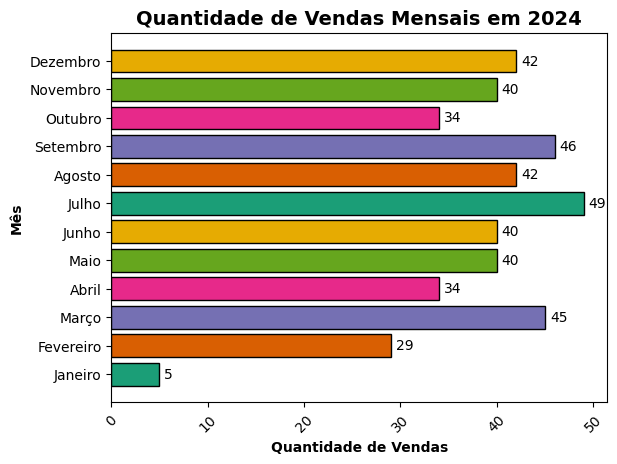

In [7]:
# Separar por ano
vendas2024 = vendas[vendas['ano'] == 2024]
vendas2025 = vendas[vendas['ano'] == 2025]

# Contar quantos pedidos por mês
vendas2024_mensais = vendas2024.groupby(['mes_numero', 'mes'])['id_pedido'].count().reset_index()
print('Quantidade de vendas mensais em 2024:')
print(vendas2024_mensais)

# Plotar gráfico
plt.barh(vendas2024_mensais['mes'],vendas2024_mensais['id_pedido'], color=sns.palettes.mpl_palette('Dark2'), edgecolor='black')
for i, valor in enumerate(vendas2024_mensais['id_pedido']): # colocar os números nas barras
    plt.text(valor + 0.5, i, f'{valor}', va='center', fontsize=10)

plt.xlabel('Quantidade de Vendas',fontweight='bold')
plt.ylabel('Mês',fontweight='bold')
plt.title('Quantidade de Vendas Mensais em 2024', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


## 💰 Faturamento mensal em 2024

Agora, analiso o **faturamento total por mês** no ano de 2024:

- Utilizo `groupby()` para somar os valores da coluna `valor_total`, agrupando por mês.
- Em seguida, crio um **gráfico de barras horizontais** para visualizar o faturamento mês a mês.
  - Os valores são formatados no padrão brasileiro (com vírgula como separador decimal).
- Também é gerado um **gráfico de pizza** para mostrar a **distribuição percentual do faturamento** entre os meses.

Esses gráficos permitem identificar os períodos com maior receita e a representatividade de cada mês no total anual.

Faturamento mensal em 2024:
    mes_numero        mes  valor_total
0            1    Janeiro      3791.70
1            2  Fevereiro     40447.85
2            3      Março     80635.85
3            4      Abril     59837.97
4            5       Maio     74062.90
5            6      Junho     73457.26
6            7      Julho     71889.71
7            8     Agosto     54069.28
8            9   Setembro     69410.32
9           10    Outubro     50516.09
10          11   Novembro     54130.00
11          12   Dezembro     68049.37


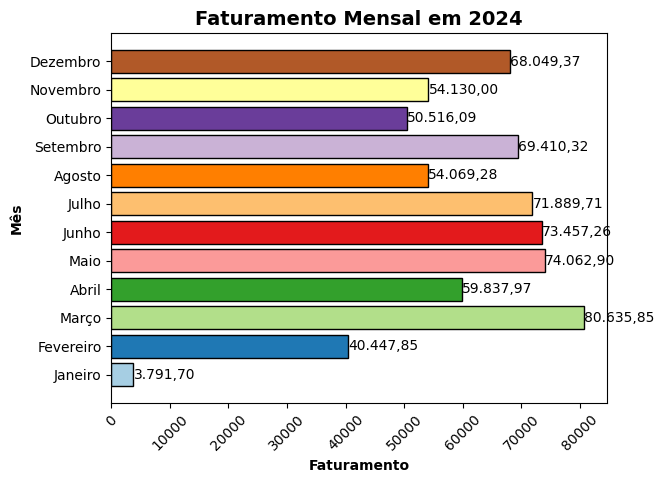

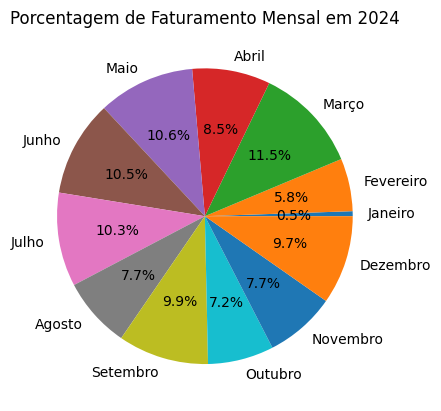

In [8]:
faturamento_mensal_2024 = vendas2024.groupby(['mes_numero', 'mes'])['valor_total'].sum().reset_index()
print('Faturamento mensal em 2024:')
print(faturamento_mensal_2024)

plt.barh(faturamento_mensal_2024['mes'],faturamento_mensal_2024['valor_total'], color=sns.color_palette("Paired"), edgecolor='black')
for i, valor in enumerate(faturamento_mensal_2024['valor_total']):
    valor_formatado = f'{valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    plt.text(valor + 12, i, valor_formatado, va='center')
plt.xlabel('Faturamento',fontweight='bold')
plt.ylabel('Mês', fontweight='bold')
plt.title('Faturamento Mensal em 2024', fontsize=14,fontweight='bold')
plt.xticks(rotation=45)
plt.show()

plt.pie(faturamento_mensal_2024['valor_total'], labels=faturamento_mensal_2024['mes'], autopct='%1.1f%%')
plt.title('Porcentagem de Faturamento Mensal em 2024')
plt.show()

## 📦 Quantidade de produtos vendidos por mês (2024)

Nesta visualização, analiso **quantos produtos foram vendidos por mês ao longo de 2024**, detalhando por tipo de produto:

- Agrupo os dados por mês e produto, somando a quantidade total vendida de cada item.
- Utilizo o `plotly.express` para criar um **gráfico de barras empilhadas interativo**, onde:
  - O eixo X representa os meses,
  - O eixo Y mostra a quantidade total vendida,
  - As cores indicam os diferentes produtos.

Esse gráfico facilita a visualização da **variação de demanda ao longo do tempo** e quais produtos se destacaram em cada período.

In [9]:
produto_por_mes_2024 = vendas2024.groupby(['mes_numero','mes','produto'])['quantidade'].sum().reset_index()


fig = px.bar(
    produto_por_mes_2024,
    x='mes',
    y='quantidade',
    color='produto',
    title='Quantidade de Produtos Vendidos por Mês (2024)',
    text='quantidade'
)

fig.update_layout(
    barmode='stack',  # empilhado
    xaxis_title='Mês',
    yaxis_title='Quantidade Vendida',
    legend_title='Produto',
    hovermode='x unified'
)

fig.show()

## 🧑‍💼 Análise das vendas por vendedor em 2024

Nesta etapa, faço a análise do desempenho dos vendedores ao longo de 2024:

- Agrupo as vendas por vendedor, contando o número total de pedidos realizados por cada um.
- Ordeno os vendedores pelo número de vendas para melhor visualização.
- Crio um **gráfico de barras horizontais** para comparar a quantidade de vendas de cada vendedor, com indicação numérica nas barras.
- Também apresento um **gráfico de pizza** que mostra a participação percentual de cada vendedor no total de vendas do ano.

Assim, é possível identificar os principais responsáveis pelas vendas e entender a distribuição do desempenho da equipe comercial.

Quantidades por vendedor em 2024:
  vendedor  id_pedido
0   Carlos         79
1      Bob         82
2    Alice         91
3   Daniel         96
4      Eva         98


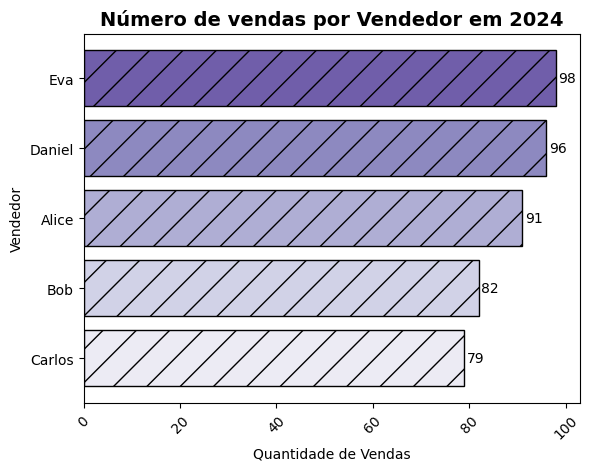

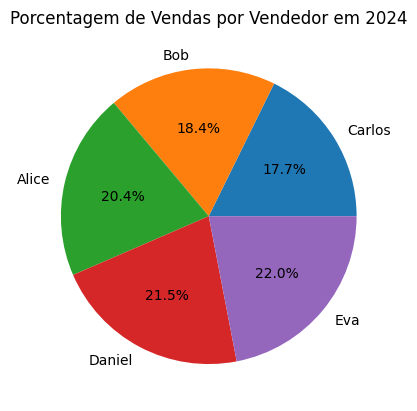

In [10]:
vendedores_2024 = vendas2024.groupby('vendedor')['id_pedido'].count().sort_values(ascending=True).reset_index()
print('Quantidades por vendedor em 2024:')
print(vendedores_2024)
plt.barh(vendedores_2024['vendedor'],vendedores_2024['id_pedido'], color=sns.color_palette("Purples"), edgecolor='black',hatch='/')
for i, valor in enumerate(vendedores_2024['id_pedido']):
    plt.text(valor + 0.5, i, f'{valor}', va='center', fontsize=10)
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Vendedor')
plt.title('Número de vendas por Vendedor em 2024', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

plt.pie(vendedores_2024['id_pedido'], labels=vendedores_2024['vendedor'], autopct='%1.1f%%')
plt.title('Porcentagem de Vendas por Vendedor em 2024')
plt.show()


## 💵 Faturamento por vendedor em 2024

Nesta análise, calculo o **faturamento total gerado por cada vendedor** durante o ano de 2024:

- Agrupo os dados por vendedor somando os valores da coluna `valor_total`.
- Ordeno os vendedores do menor para o maior faturamento para facilitar a visualização.
- Crio um **gráfico de barras horizontais** para comparar o faturamento individual, com valores formatados no padrão brasileiro.
- Também apresento um **gráfico de pizza** mostrando a participação percentual de cada vendedor no faturamento total.

Valor por vendedor em 2024:
  vendedor  valor_total
0    Alice    118393.07
1      Bob    123135.44
2   Carlos    132777.34
3      Eva    150591.65
4   Daniel    175400.80


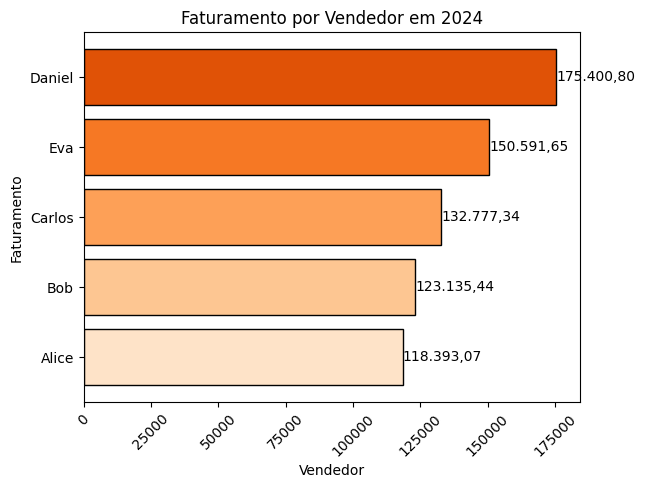

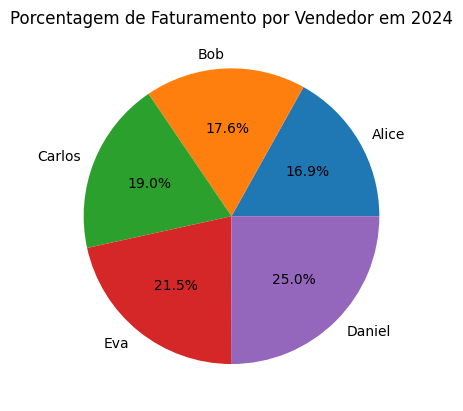

In [11]:
faturamento_vendedores_2024 = vendas2024.groupby('vendedor')['valor_total'].sum().sort_values(ascending=True).reset_index()
print('Valor por vendedor em 2024:')
print(faturamento_vendedores_2024)
plt.barh(faturamento_vendedores_2024['vendedor'],faturamento_vendedores_2024['valor_total'],color=sns.color_palette("Oranges"),edgecolor='black')
for i, valor in enumerate(faturamento_vendedores_2024['valor_total']):
    valor_formatado = f'{valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    plt.text(valor + 10, i, valor_formatado, va='center')
plt.xlabel('Vendedor')
plt.ylabel('Faturamento')
plt.title('Faturamento por Vendedor em 2024')
plt.xticks(rotation=45)
plt.show()

plt.pie(faturamento_vendedores_2024['valor_total'], labels=faturamento_vendedores_2024['vendedor'], autopct='%1.1f%%')
plt.title('Porcentagem de Faturamento por Vendedor em 2024')
plt.show()

## 🛒 Quantidade de produtos vendidos por vendedor em 2024

Neste gráfico, exploro a distribuição da **quantidade de produtos vendidos por cada vendedor** ao longo do ano de 2024:

- Agrupo os dados por vendedor e produto, somando a quantidade total vendida.
- Utilizo o `plotly.express` para criar um **gráfico de barras empilhadas interativo**, que permite comparar a performance individual de cada vendedor em relação a diferentes produtos.
- O gráfico mostra claramente quais vendedores venderam mais de determinados produtos, facilitando a análise detalhada do portfólio por vendedor.

In [12]:
produtos_por_vendedor_2024 = vendas2024.groupby(['vendedor', 'produto'])['quantidade'].sum().reset_index()
print('Quantidade de produtos por vendedor em 2024:')
print(produtos_por_vendedor_2024)

fig = px.bar(
    produtos_por_vendedor_2024,
    x='vendedor',
    y='quantidade',
    color='produto',
    title='Quantidade de Produtos por Vendedor (2024)',
    text='quantidade'
)

fig.update_layout(
    barmode='stack',  # empilhado
    xaxis_title='Vendedor',
    yaxis_title='Quantidade de Produtos',
    legend_title='Produto',
    hovermode='x unified'

)

fig.show()

Quantidade de produtos por vendedor em 2024:
   vendedor              produto  quantidade
0     Alice      Fones De Ouvido        53.0
1     Alice             Notebook        47.0
2     Alice  Relógio Inteligente        32.0
3     Alice           Smartphone        61.0
4     Alice               Tablet        46.0
5       Bob      Fones De Ouvido        41.0
6       Bob             Notebook        75.0
7       Bob  Relógio Inteligente        50.0
8       Bob           Smartphone        54.0
9       Bob               Tablet        37.0
10   Carlos      Fones De Ouvido        49.0
11   Carlos             Notebook        37.0
12   Carlos  Relógio Inteligente        46.0
13   Carlos           Smartphone        35.0
14   Carlos               Tablet        57.0
15   Daniel      Fones De Ouvido        52.0
16   Daniel             Notebook        64.0
17   Daniel  Relógio Inteligente        65.0
18   Daniel           Smartphone        42.0
19   Daniel               Tablet        72.0
20      Ev

## 📉 Análise de tendência das vendas mensais em 2024 (sem janeiro)

Nesta etapa, analiso a **tendência das vendas mensais ao longo de 2024**, excluindo o mês de janeiro para evitar possíveis efeitos fora da curva:

- Utilizo os dados mensais filtrados para remover janeiro.
- Calculo uma **regressão linear** para identificar a tendência geral de crescimento ou queda nas vendas.
- Ploto as vendas reais como pontos azuis e a linha de tendência em vermelho tracejado.
- Essa visualização ajuda a compreender se as vendas estão aumentando, diminuindo ou se mantendo estáveis ao longo do ano.

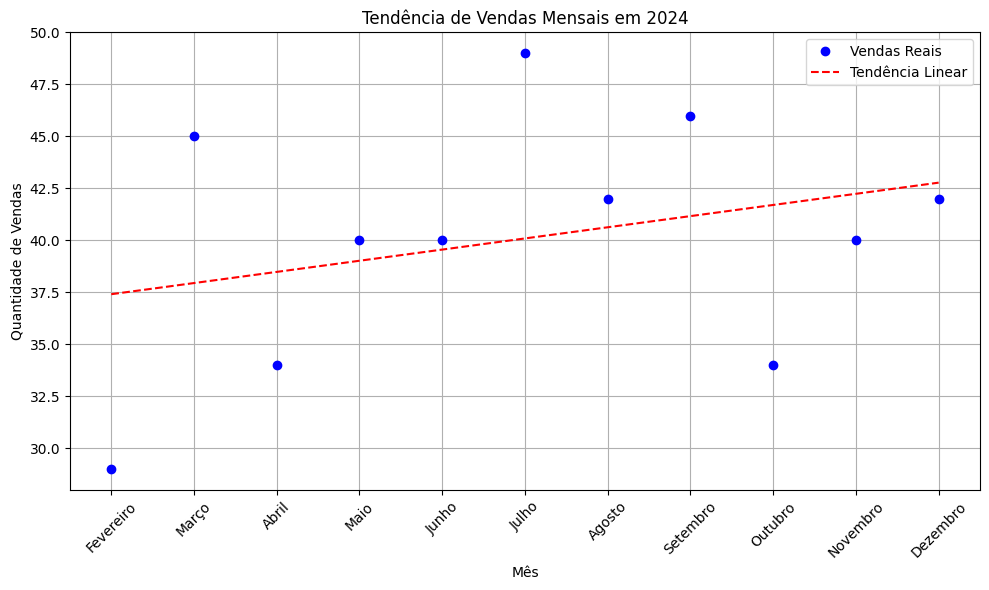

In [13]:
# 1. Filtrar os dados sem janeiro (mês 1)
vendas_sem_janeiro = vendas2024_mensais[vendas2024_mensais['mes_numero'] != 1]
# Dados base
x = vendas_sem_janeiro['mes_numero']  # Eixo X: número do mês
y = vendas_sem_janeiro['id_pedido']   # Eixo Y: vendas reais

# Calcular a regressão linear (reta de tendência)
m, b = np.polyfit(x, y, 1)

# Plotar as vendas reais (pontos)
plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o', color='blue', linestyle='', label='Vendas Reais')

# Plotar a linha de tendência
plt.plot(x, m*x + b, color='red', linestyle='--', label='Tendência Linear')

# Rótulos e título
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')
plt.title('Tendência de Vendas Mensais em 2024')
plt.xticks(x, vendas_sem_janeiro['mes'], rotation=45)  # usar nomes dos meses no eixo X

# Legenda
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 💎 Identificação das vendas extremas em 2024

Nesta análise, identifico as vendas com os maiores e menores valores totais no ano de 2024:

- Utilizo `idxmax()` para encontrar a venda com o **maior valor total**.
- Utilizo `idxmin()` para encontrar a venda com o **menor valor total**.
- Exibo os detalhes completos dessas vendas para entender melhor as características dessas transações extremas.

Essa análise ajuda a destacar casos atípicos e a compreender a amplitude dos valores negociados.

In [28]:
venda_mais_cara = vendas2024.loc[vendas2024['valor_total'].idxmax()].reset_index()
venda_mais_barata = vendas2024.loc[vendas2024['valor_total'].idxmin()]
print('Venda mais cara:')
print(venda_mais_cara)
print('Venda mais barata:')
print(venda_mais_barata)

Venda mais cara:
          index                   87
0     id_pedido                P0087
1    id_cliente                C0087
2       produto             Notebook
3         preço               996.12
4    quantidade                  5.0
5     datavenda  2024-09-04 00:00:00
6      vendedor                  Eva
7   valor_total               4980.6
8           ano                 2024
9    mes_numero                    9
10          mes             Setembro
Venda mais barata:
id_pedido                    P0348
id_cliente                   C0348
produto                     Tablet
preço                        74.84
quantidade                     1.0
datavenda      2024-07-06 00:00:00
vendedor                       Bob
valor_total                  74.84
ano                           2024
mes_numero                       7
mes                          Julho
Name: 348, dtype: object


## 🏷️ Identificação dos produtos com maior e menor preço em 2024

Neste passo, identifico os produtos que tiveram os preços mais altos e mais baixos durante o ano de 2024:

- Uso `idxmax()` para encontrar o produto com o **maior preço unitário**.
- Uso `idxmin()` para encontrar o produto com o **menor preço unitário**.
- Exibo as informações completas desses produtos para análise detalhada.

Esse levantamento é útil para entender a variação de preços no portfólio comercial.

In [14]:
produto_mais_caro = vendas2024.loc[vendas2024['preço'].idxmax()]
produto_mais_barato = vendas2024.loc[vendas2024['preço'].idxmin()]
print('Produto mais caro:')
print(produto_mais_caro)
print('Produto mais barato:')
print(produto_mais_barato)

Produto mais caro:
id_pedido                    P0327
id_cliente                   C0327
produto                   Notebook
preço                       999.26
quantidade                     3.0
datavenda      2024-04-27 00:00:00
vendedor                       Eva
valor_total                2997.78
ano                           2024
mes_numero                       4
mes                          Abril
Name: 327, dtype: object
Produto mais barato:
id_pedido                    P0104
id_cliente                   C0104
produto        Relógio Inteligente
preço                        51.06
quantidade                     4.0
datavenda      2024-06-12 00:00:00
vendedor                       Eva
valor_total                 204.24
ano                           2024
mes_numero                       6
mes                          Junho
Name: 104, dtype: object


## 📊 Produtos mais vendidos em 2025

Nesta etapa, analiso a quantidade total de cada produto vendido durante o ano de 2025:

- Agrupo os dados por produto e somo a quantidade vendida.
- Ordeno os produtos do mais vendido para o menos vendido.
- Crio um **gráfico de barras horizontais** para visualizar o volume de vendas de cada produto, com os valores indicados nas barras.

Essa análise ajuda a identificar os produtos com maior demanda no ano.

Produtos mais vendidos em 2025:
               produto  quantidade
0  Relógio Inteligente        41.0
1      Fones De Ouvido        24.0
2             Notebook        10.0
3           Smartphone        10.0
4               Tablet         8.0


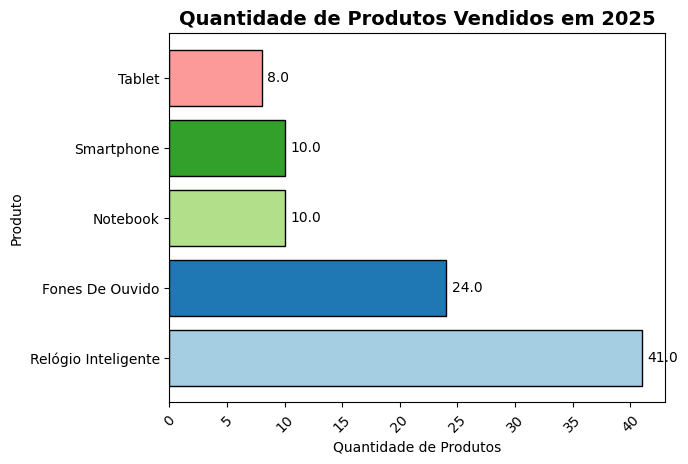

In [15]:
produtos_mais_vendidos2025=vendas2025.groupby('produto')['quantidade'].sum().sort_values(ascending=False).reset_index()
print('Produtos mais vendidos em 2025:')
print(produtos_mais_vendidos2025)

plt.barh(produtos_mais_vendidos2025['produto'],produtos_mais_vendidos2025['quantidade'], color=sns.color_palette("Paired"), edgecolor='black')
for i, valor in enumerate(produtos_mais_vendidos2025['quantidade']):
    plt.text(valor + 0.5, i, f'{valor}', va='center', fontsize=10)

plt.xlabel('Quantidade de Produtos')
plt.ylabel('Produto')
plt.title('Quantidade de Produtos Vendidos em 2025', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()



## 📦 Quantidade de produtos vendidos em 2024

Nesta análise, verifico a quantidade total vendida de cada produto durante o ano de 2024:

- Agrupo os dados por produto somando as quantidades vendidas.
- Visualizo os resultados com um **gráfico de barras horizontais**, exibindo a quantidade vendida de cada produto.
- Também apresento um **gráfico de pizza** que mostra a participação percentual de cada produto no total vendido.

Essa etapa permite identificar os produtos com maior relevância no portfólio da empresa em 2024.

Quantidade de produtos em 2025:
               produto  quantidade
0      Fones De Ouvido       244.0
1             Notebook       273.0
2  Relógio Inteligente       257.0
3           Smartphone       261.0
4               Tablet       284.0


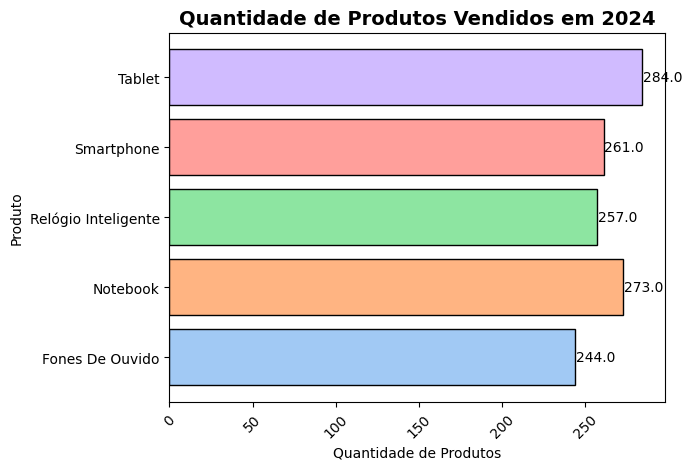

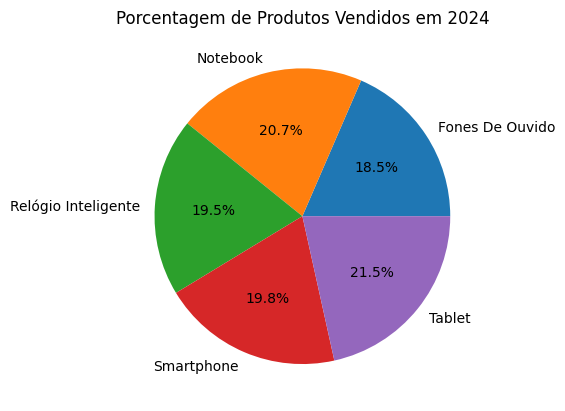

In [16]:
quantidade_produtos2024 = vendas2024.groupby('produto')['quantidade'].sum().reset_index()
print('Quantidade de produtos em 2025:')
print(quantidade_produtos2024)

plt.barh(quantidade_produtos2024['produto'],quantidade_produtos2024['quantidade'], color=sns.color_palette("pastel"), edgecolor='black')
for i, valor in enumerate(quantidade_produtos2024['quantidade']):
    plt.text(valor + 0.5, i, f'{valor}', va='center', fontsize=10)

plt.xlabel('Quantidade de Produtos')
plt.ylabel('Produto')
plt.title('Quantidade de Produtos Vendidos em 2024', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

plt.pie(quantidade_produtos2024['quantidade'], labels=quantidade_produtos2024['produto'], autopct='%1.1f%%')
plt.title('Porcentagem de Produtos Vendidos em 2024')
plt.show()


## 🏆 Top 5 vendedores em faturamento em 2025

Nesta análise, identifico os cinco vendedores que mais geraram faturamento durante o ano de 2025:

- Agrupo os dados por vendedor e somo o faturamento (`valor_total`).
- Ordeno os vendedores do maior para o menor faturamento.
- Crio um **gráfico de barras horizontais** para visualizar o desempenho dos top 5 vendedores, com os valores exibidos nas barras.

Essa análise destaca os principais contribuintes para a receita da empresa no ano.

Top 5 vendedores em 2025:
  vendedor  valor_total
0      Bob     13681.74
1      Eva     13612.20
2   Daniel     11226.22
3   Carlos      8169.96
4    Alice      7686.22


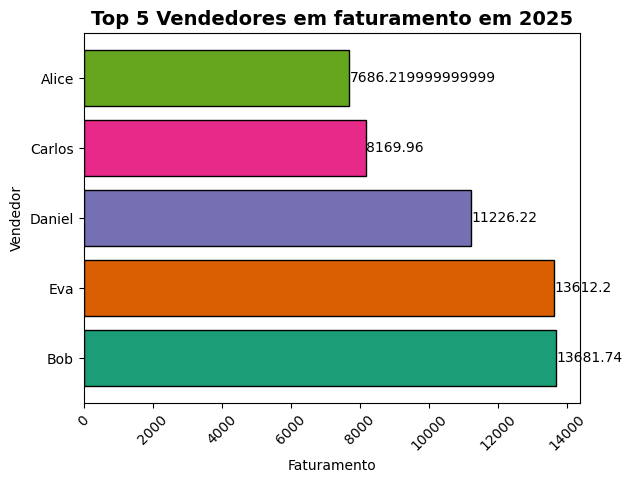

In [20]:
top_vendedor2025=vendas2025.groupby('vendedor')['valor_total'].sum().sort_values(ascending=False).reset_index()
print('Top 5 vendedores em 2025:')
print(top_vendedor2025.head(5))
plt.barh(top_vendedor2025['vendedor'],top_vendedor2025['valor_total'], color=sns.palettes.mpl_palette('Dark2'), edgecolor='black')
for i, valor in enumerate(top_vendedor2025['valor_total']):
    plt.text(valor + 10, i, f'{valor}', va='center', fontsize=10)
    plt.xlabel('Faturamento')
    plt.ylabel('Vendedor')
    plt.title('Top 5 Vendedores em faturamento em 2025', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)

## 🏅 Top 5 vendedores por quantidade de vendas em 2025

Aqui, analiso os cinco vendedores com maior quantidade de vendas no ano de 2025:

- Exibo os cinco primeiros vendedores com base no total de vendas realizadas.
- Crio um gráfico de barras horizontais para comparar a quantidade vendida por cada um desses vendedores.
- Os valores das vendas são exibidos ao lado das barras para facilitar a leitura.

Esse gráfico ajuda a identificar os vendedores mais ativos em termos de volume de vendas.

Top 5 vendedores em 2025:
  vendedor  quantidade
0      Eva        25.0
1   Daniel        21.0
2      Bob        20.0
3   Carlos        14.0
4    Alice        13.0


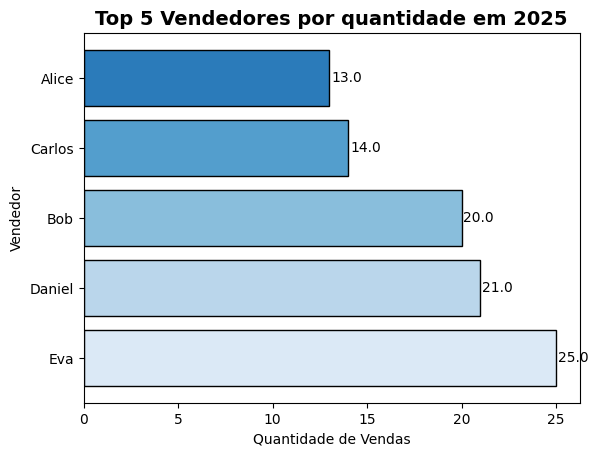

In [21]:
vendedor2025=vendas2025.groupby('vendedor')['quantidade'].sum().sort_values(ascending=False).reset_index()
print('Top 5 vendedores em 2025:')
print(vendedor2025.head(5))
plt.barh(vendedor2025['vendedor'],vendedor2025['quantidade'], color= sns.color_palette("Blues"), edgecolor='black')
for i, valor in enumerate(vendedor2025['quantidade']):
    plt.text(valor + 0.1, i, f'{valor}', va='center', fontsize=10)
    plt.xlabel('Quantidade de Vendas')
    plt.ylabel('Vendedor')
    plt.title('Top 5 Vendedores por quantidade em 2025', fontsize=14, fontweight='bold')


## 📅 Análise detalhada das vendas em março de 2024

Nesta etapa, foco na análise do mês de março de 2024 para entender melhor o desempenho comercial:

- Agrupo o faturamento por **produto** e ordeno do maior para o menor.
- Agrupo o faturamento por **vendedor** para identificar os maiores responsáveis pelo resultado no mês.
- Calculo o **ticket médio** de março, ou seja, o valor médio gasto por pedido, e comparo com o ticket médio geral do ano.
- Calculo também a **média de produtos por pedido** em março para entender o volume médio de itens por compra.

Essas métricas ajudam a avaliar o comportamento das vendas em um mês específico, possibilitando análises mais pontuais e estratégicas.

In [22]:
marco = vendas2024[vendas2024['mes'] == 'Março']
faturamento_produto_marco = marco.groupby('produto')['valor_total'].sum().sort_values(ascending=False).reset_index()
print(faturamento_produto_marco)
faturamento_vendedor_marco = marco.groupby('vendedor')['valor_total'].sum().sort_values(ascending=False).reset_index()
print(faturamento_vendedor_marco)
ticket_medio_marco = marco['valor_total'].mean()
ticket_medio_geral = vendas2024['valor_total'].mean()
print(f'Ticket médio março: {ticket_medio_marco:.2f}')
print(f'Ticket médio geral: {ticket_medio_geral:.2f}')
produtos_por_pedido_marco = marco.groupby('id_pedido')['quantidade'].sum().mean()
print(f'Média de produtos por pedido em março: {produtos_por_pedido_marco:.2f}')



               produto  valor_total
0             Notebook     19688.23
1           Smartphone     18210.69
2  Relógio Inteligente     16940.11
3      Fones De Ouvido     16241.62
4               Tablet      9555.20
  vendedor  valor_total
0   Daniel     23928.98
1      Eva     21670.12
2    Alice     18717.88
3   Carlos      9086.56
4      Bob      7232.31
Ticket médio março: 1791.91
Ticket médio geral: 1570.18
Média de produtos por pedido em março: 3.16


## 📅 Faturamento diário em março de 2024

Nesta análise, examino o **faturamento diário ao longo do mês de março de 2024**:

- Agrupo os dados por data de venda, somando o faturamento total de cada dia.
- Crio um gráfico de linha para visualizar a variação diária do faturamento.
- A visualização permite identificar padrões, picos e possíveis dias de maior ou menor movimento dentro do mês.

Esse tipo de gráfico é útil para analisar sazonalidades e o comportamento das vendas em nível diário.

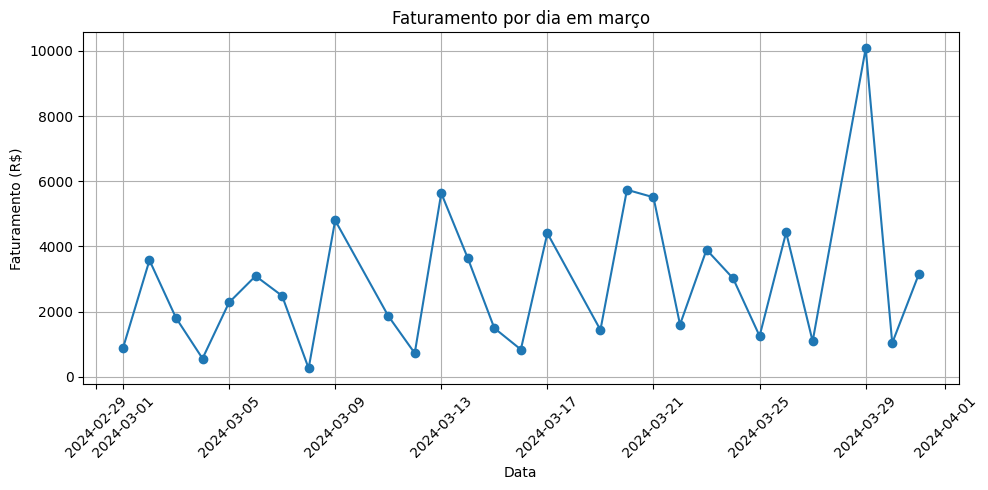

In [23]:
marco_por_dia = marco.groupby('datavenda')['valor_total'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(marco_por_dia['datavenda'], marco_por_dia['valor_total'], marker='o')
plt.xticks(rotation=45)
plt.title('Faturamento por dia em março')
plt.xlabel('Data')
plt.ylabel('Faturamento (R$)')
plt.grid()
plt.tight_layout()
plt.show()

## 📅 Quantidade de produtos vendidos por dia em março de 2024

Neste gráfico, analiso a **quantidade total de produtos vendidos diariamente durante o mês de março de 2024**:

- Agrupo os dados por data de venda, somando a quantidade de produtos vendidos em cada dia.
- Crio um gráfico de linha para mostrar a variação diária no volume de produtos vendidos.
- Essa visualização ajuda a identificar dias com maior ou menor movimentação de produtos no mês.

É uma forma eficiente de entender a dinâmica diária das vendas em termos de volume.


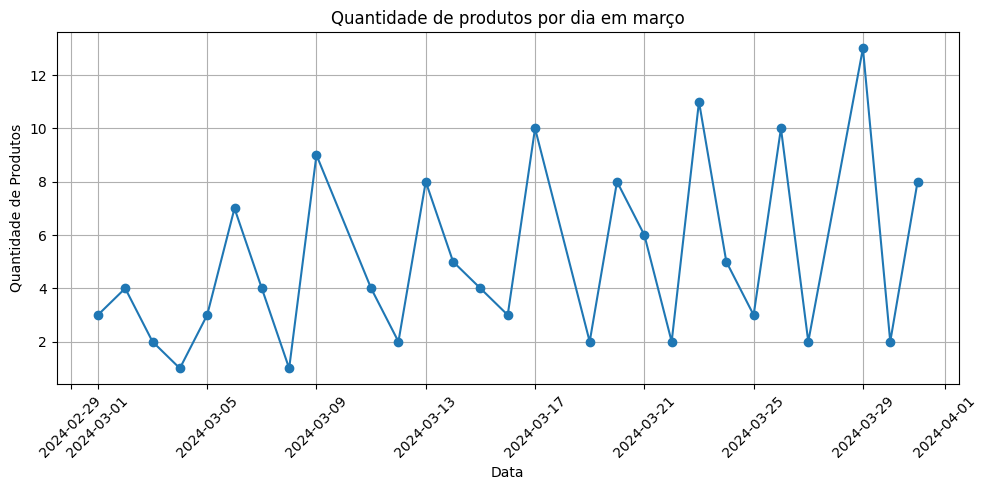

In [24]:
março_por_dia = marco.groupby('datavenda')['quantidade'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(março_por_dia['datavenda'], março_por_dia['quantidade'], marker='o')
plt.xticks(rotation=45)
plt.title('Quantidade de produtos por dia em março')
plt.xlabel('Data')
plt.ylabel('Quantidade de Produtos')
plt.grid()
plt.tight_layout()
plt.show()

## 📅 Quantidade de vendas por dia em março de 2024

Nesta análise, acompanho a **quantidade total de vendas realizadas diariamente durante março de 2024**:

- Agrupo os dados por data de venda e conto o número de pedidos (`id_pedido`) por dia.
- Crio um gráfico de linha para visualizar a variação diária no número de vendas.
- Essa visualização permite identificar dias com maior fluxo de vendas e entender a sazonalidade no período.

Esse acompanhamento diário ajuda a detectar tendências e comportamentos no volume de vendas.

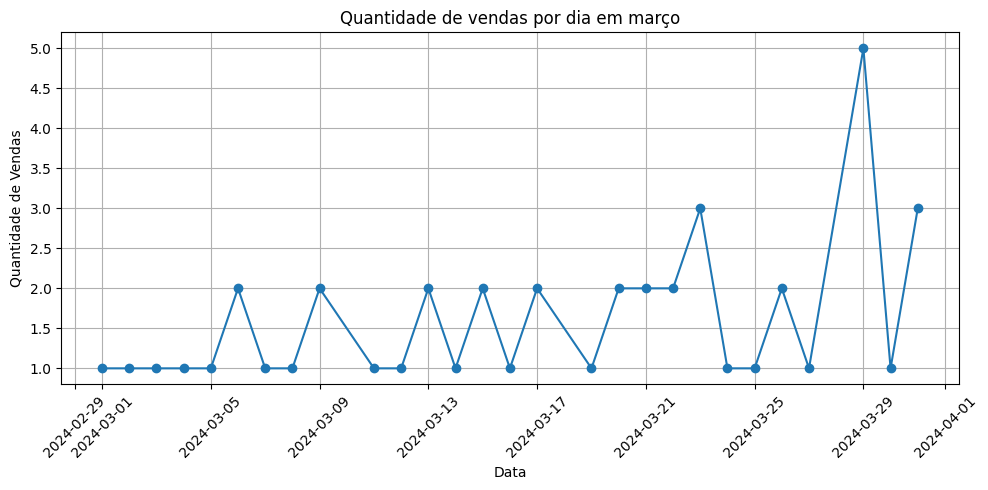

In [25]:
março_vendas_por_dia = marco.groupby('datavenda')['id_pedido'].count().reset_index()
março_vendas_por_dia.columns = ['Data', 'Quantidade de Vendas']

plt.figure(figsize=(10,5))
plt.plot(março_vendas_por_dia['Data'], março_vendas_por_dia['Quantidade de Vendas'], marker='o')
plt.xticks(rotation=45)
plt.title('Quantidade de vendas por dia em março')
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.grid()
plt.tight_layout()
plt.show()

## 🥧 Porcentagem de produtos vendidos em março de 2024

Nesta etapa, analiso a **participação percentual de cada produto nas vendas de março**:

- Agrupo a quantidade total vendida por produto.
- Utilizo um gráfico de **pizza** para mostrar a fatia de cada produto no total vendido no mês.
- Essa visualização permite identificar quais produtos tiveram maior peso nas vendas de março.

É uma forma clara e direta de visualizar a composição do mix de produtos vendidos no período.

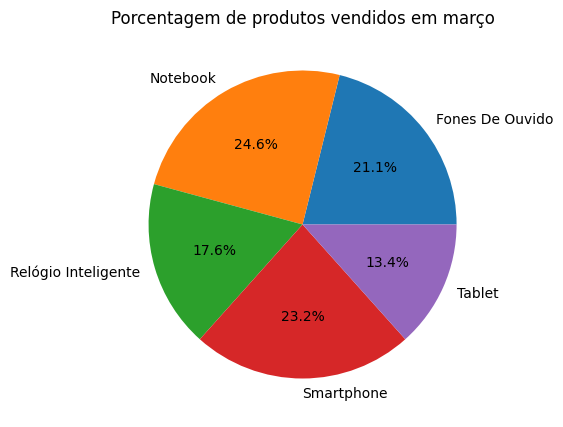

In [26]:
produtos_vendidos_marco = marco.groupby('produto')['quantidade'].sum().reset_index()
produtos_vendidos_marco.columns
plt.figure(figsize=(10,5))
plt.pie(produtos_vendidos_marco['quantidade'], labels=produtos_vendidos_marco['produto'], autopct='%1.1f%%')
plt.title('Porcentagem de produtos vendidos em março')
plt.show()


## 🥧 Participação percentual do faturamento por vendedor em março de 2024

Nesta análise, verifico a contribuição de cada vendedor para o faturamento total de março:

- Agrupo o faturamento total por vendedor e ordeno do maior para o menor.
- Utilizo um gráfico de **pizza** para ilustrar a participação percentual de cada vendedor no faturamento mensal.
- Essa visualização ajuda a identificar os vendedores que mais impactaram as receitas no mês.

Uma forma visual eficiente de analisar a distribuição do faturamento entre os vendedores.

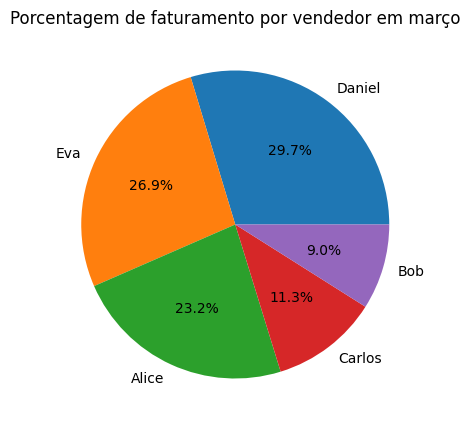

In [27]:
faturamento_vendedor_marco = marco.groupby('vendedor')['valor_total'].sum().sort_values(ascending=False).reset_index()
faturamento_vendedor_marco.columns
plt.figure(figsize=(10,5))
plt.pie(faturamento_vendedor_marco['valor_total'], labels=faturamento_vendedor_marco['vendedor'], autopct='%1.1f%%')
plt.title('Porcentagem de faturamento por vendedor em março')
plt.show()

## 📝 Conclusão da Análise de Vendas – 2024

A análise das vendas de 2024 revelou os seguintes destaques:

- **Julho foi o mês com maior quantidade de produtos vendidos**, o que pode indicar uma sazonalidade positiva nesse período. Promoções, campanhas ou aumento na demanda podem ter impulsionado esse resultado.

- **Março apresentou o maior faturamento do ano**, mesmo sem liderar em número de vendas. Isso se explica principalmente pelo **dia 3 de março**, que teve um pico expressivo de vendas. É provável que alguma ação pontual, como uma campanha promocional ou grande negociação, tenha ocorrido nesse dia.

- **Eva e Daniel foram os vendedores com maior número de produtos vendidos** em 2024, mostrando eficiência em volume.  
  Já **Daniel** se destacou também no **faturamento total**, o que sugere que, além de vender muito, ele também vendeu produtos de maior valor agregado.

- Por outro lado, **Carlos teve o menor número de vendas**, e **Alice foi a vendedora com o menor faturamento**, indicando possíveis desafios em performance ou menor participação em oportunidades comerciais.

- **Tablet foi o produto mais vendido pelos vendedores com melhor desempenho (Eva e Daniel)**, indicando que esse item pode ter sido um dos responsáveis pelo bom resultado desses profissionais.

Essas informações são essenciais para a tomada de decisões estratégicas. É possível, por exemplo:

- Reforçar campanhas em meses como julho;
- Investigar e replicar o sucesso de março;
- Incentivar vendedores com bom desempenho;
- Identificar oportunidades de treinamento ou apoio para aqueles com menor performance;
- Avaliar o papel do produto "Tablet" nas vendas e explorar mais seu potencial no portfólio.
